# Gaussian Splatting 

### This notebook demonstrates the application of Gaussian splatting to images from the CIFAR-10 & Fashion-MNIST dataset. 
- Gaussian splatting is a rendering technique that replaces each pixel of an image with a Gaussian "blob," effectively smoothing the image and creating a unique visualization style. 
- The process is performed separately for each color channel (RGB) to preserve the original colors

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Define the gaussian splatting function & aply it to the image

In [5]:
def gaussian_kernel(size, sigma):
    """Creates a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(
            -((x - (size // 2)) ** 2 + (y - (size // 2)) ** 2) / (2 * sigma ** 2)
        ),
        (size, size),
    )
    return kernel / np.sum(kernel)

def gaussian_splat_image(image, kernel_size=5, sigma=1.0):
    """Apply Gaussian splatting to an image."""
    rows, cols = image.shape
    splatted_image = np.zeros_like(image, dtype=np.float32)
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian splats to each pixel in the image
    for i in range(rows):
        for j in range(cols):
            # Place Gaussian centered at (i, j)
            patch_x_start = max(i - kernel_size // 2, 0)
            patch_x_end = min(i + kernel_size // 2 + 1, rows)
            patch_y_start = max(j - kernel_size // 2, 0)
            patch_y_end = min(j + kernel_size // 2 + 1, cols)
            patch = kernel[
                patch_x_start - (i - kernel_size // 2):patch_x_end - (i - kernel_size // 2),
                patch_y_start - (j - kernel_size // 2):patch_y_end - (j - kernel_size // 2),
            ]
            splatted_image[patch_x_start:patch_x_end, patch_y_start:patch_y_end] += patch * image[i, j]
    
    # Normalize the splatted image
    splatted_image = np.clip(splatted_image, 0, 255).astype(np.uint8)
    return splatted_image

### Let's test Gaussian Splatting using Fashion-Mnist dataset 

In [10]:

# Load Fashion-MNIST dataset
print("Fetching Fashion-MNIST dataset...")
fashion_mnist = fetch_openml("Fashion-MNIST", version=1, as_frame=False)
images = fashion_mnist.data.reshape(-1, 28, 28)  # Reshape to 28x28 images
labels = fashion_mnist.target.astype(int)  # Labels for each image

# Select a random image from the dataset
idx = np.random.randint(0, len(images))
original_image = images[idx]
label = labels[idx]

# Apply Gaussian splatting
splatted_image = gaussian_splat_image(original_image, kernel_size=7, sigma=5)


Fetching Fashion-MNIST dataset...


### Visualizing the results

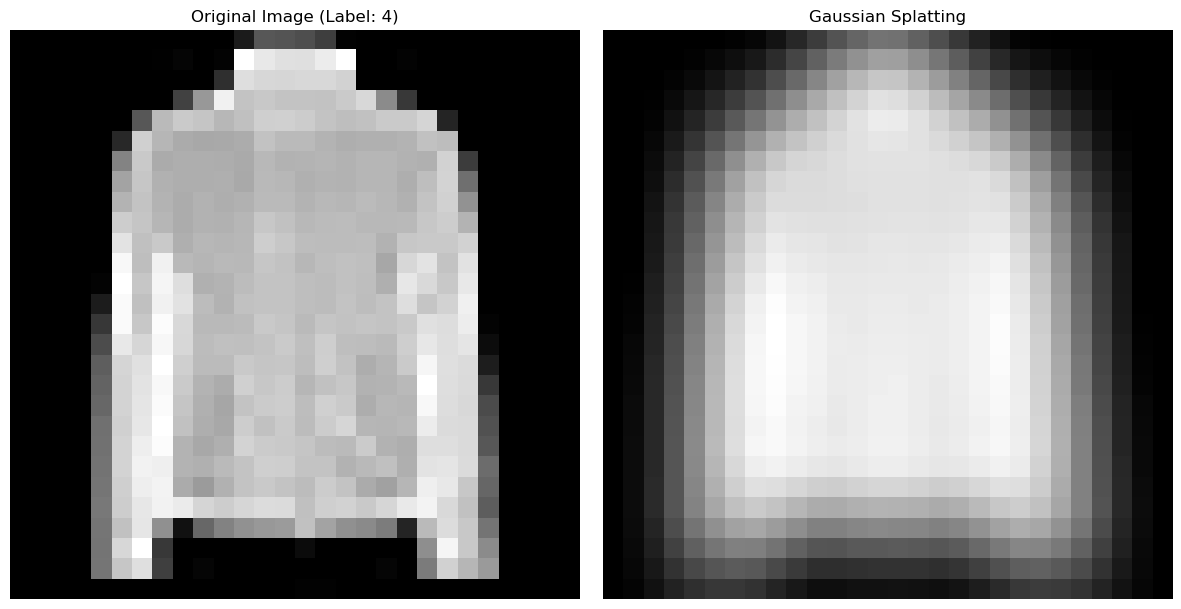

In [9]:

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {label})")
plt.imshow(original_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Splatting")
plt.imshow(splatted_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


### Playing around with Gaussian Splatting using CIFAR dataset

Loading CIFAR-10 dataset...


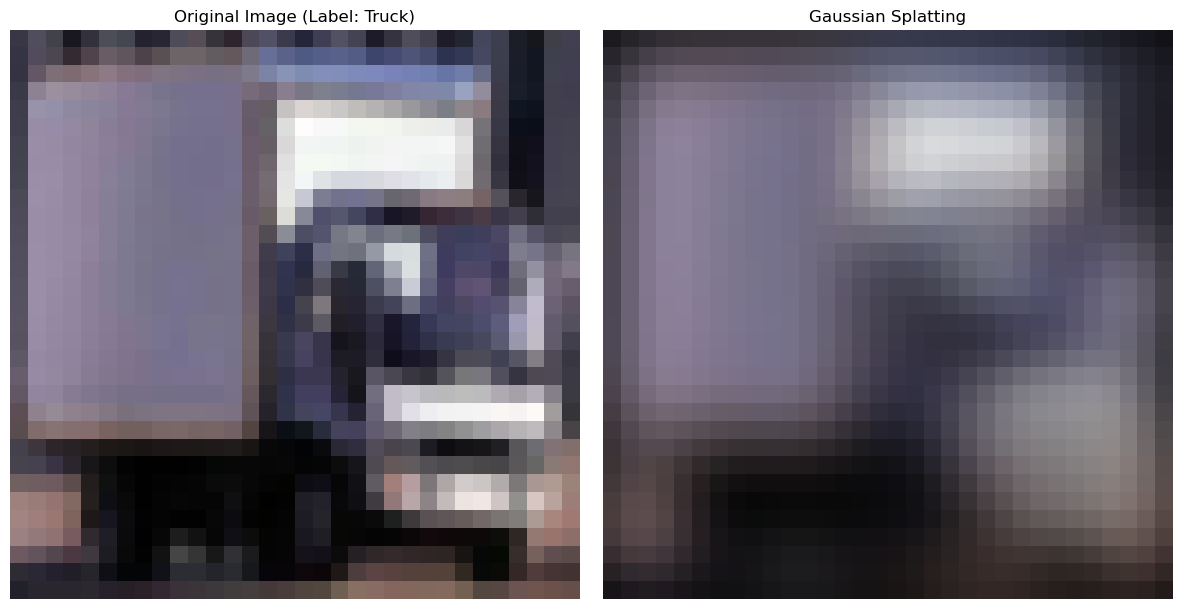

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


def gaussian_kernel(size, sigma):
    """Creates a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(
            -((x - (size // 2)) ** 2 + (y - (size // 2)) ** 2) / (2 * sigma ** 2)
        ),
        (size, size),
    )
    return kernel / np.sum(kernel)

def gaussian_splat_image_rgb(image, kernel_size=5, sigma=1.0):
    """Apply Gaussian splatting to an RGB image."""
    rows, cols, channels = image.shape
    splatted_image = np.zeros_like(image, dtype=np.float32)
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian splats to each pixel in each channel
    for c in range(channels):
        for i in range(rows):
            for j in range(cols):
                # Place Gaussian centered at (i, j)
                patch_x_start = max(i - kernel_size // 2, 0)
                patch_x_end = min(i + kernel_size // 2 + 1, rows)
                patch_y_start = max(j - kernel_size // 2, 0)
                patch_y_end = min(j + kernel_size // 2 + 1, cols)
                patch = kernel[
                    patch_x_start - (i - kernel_size // 2):patch_x_end - (i - kernel_size // 2),
                    patch_y_start - (j - kernel_size // 2):patch_y_end - (j - kernel_size // 2),
                ]
                splatted_image[patch_x_start:patch_x_end, patch_y_start:patch_y_end, c] += patch * image[i, j, c]

    splatted_image = np.clip(splatted_image, 0, 255).astype(np.uint8)
    return splatted_image


print("Loading CIFAR-10 dataset...")
(x_train, y_train), (_, _) = cifar10.load_data()

# Select a random image from the dataset
idx = np.random.randint(0, len(x_train))
original_image = x_train[idx]
label = y_train[idx][0]

# Class labels for CIFAR-10
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Apply Gaussian splatting
splatted_image = gaussian_splat_image_rgb(original_image, kernel_size=7, sigma=2.0)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title(f"Original Image (Label: {class_labels[label]})")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Splatting")
plt.imshow(splatted_image)
plt.axis("off")

plt.tight_layout()
plt.show()
